# CLUSTERING - K-MEANS

Tugas: Membuat program clustering menggunakan K-means dan Elbow, Dataset yang digunakan yaitu bedak bayi sales di jawa timur


In [1]:
#importing library
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # penscakalaan nilai data
from sklearn.manifold import TSNE # t-distributed sthocastic Neighbour embedding

In [2]:
#importing dataset
data1 = pd.read_csv("bedakbayi.csv")

In [3]:
#data=pd.read_csv("Iris.csv")

In [4]:
data1.head()

,Tahun,Coverage,sales(mio)
0,2014,Kab. Gresik,277.34
1,2014,Kab. Bangkalan,208.39
2,2014,Kab. Sampang,204.99
3,2014,Kab. Pamekasan,170.51
4,2014,Kab. Sumenep,188.30


In [5]:
datax=data1.drop(["Tahun","Coverage"], axis=1)

In [6]:
datax.head()

,sales(mio)
0,277.34
1,208.39
2,204.99
3,170.51
4,188.30


In [7]:
datax.to_csv("bedakbayi_baru.csv", index=False)

In [8]:
X=pd.read_csv("bedakbayi_baru.csv")

In [9]:
X

,sales(mio)
0,277.34
1,208.39
2,204.99
3,170.51
4,188.30
...,...
61,335.20
62,211.68
63,162.83
64,94.69


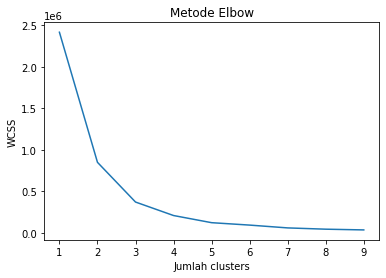

In [10]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#menggambar ggrafik elbow    
plt.plot(range(1,10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[2.87384392e-01],
       [2.15733139e-01],
       [2.12199938e-01],
       [1.76369116e-01],
       [1.94856074e-01],
       [3.33897953e-01],
       [2.33918736e-01],
       [5.94959992e-01],
       [4.87145381e-01],
       [2.86189338e-02],
       [1.56915723e-03],
       [1.19120856e-01],
       [8.23547750e-02],
       [4.44663826e-02],
       [5.31435103e-02],
       [7.41556687e-02],
       [9.43157020e-02],
       [2.37337629e-01],
       [1.49579133e-01],
       [1.14870622e-01],
       [6.64553673e-02],
       [5.83497870e-02],
       [3.39135405e-01],
       [2.54619142e-01],
       [2.50452042e-01],
       [2.08188715e-01],
       [2.30001039e-01],
       [3.94014341e-01],
       [2.76078146e-01],
       [7.01953653e-01],
       [5.74779175e-01],
       [1.39769303e-02],
       [3.84495480e-04],
       [1.59077211e-01],
       [1.10069625e-01],
       [5.95552323e-02],
       [7.11212720e-02],
       [9.91374831e-02],
       [9.76514600e-02],
       [2.45671828e-01],


In [13]:
df_scala = pd.DataFrame({'Sales': x_scaled[:, 0]})
#df_scala = pd.DataFrame({'1': x_scaled[:, 0], '2': x_scaled[:, 1],'3': x_scaled[:, 2],'4': x_scaled[:, 3],'5': x_scaled[:, 4],'6': x_scaled[:, 5],'7': x_scaled[:, 6],'8': x_scaled[:, 7]})

In [14]:
df_scala

,Sales
0,0.287384
1,0.215733
2,0.212200
3,0.176369
4,0.194856
...,...
61,0.347511
62,0.219152
63,0.168388
64,0.097579


In [15]:
#Reduksi Dimensi
tsne = TSNE(n_components=2, random_state=0)
tsne

TSNE(random_state=0)

In [16]:
tsne_obj= tsne.fit_transform(x_scaled)
tsne_obj

array([[ 3.27466369e+00, -2.17542000e+01],
       [-1.48846722e+00, -9.40578651e+00],
       [ 1.23184566e+01, -5.48031044e+00],
       [-1.61117327e+00, -1.74453557e+00],
       [ 2.79577351e+00, -4.46305418e+00],
       [ 7.65907383e+00, -2.48199291e+01],
       [ 6.03638506e+00, -1.25775623e+01],
       [ 1.54659910e+01, -4.17408905e+01],
       [ 1.92599964e+01, -3.24193077e+01],
       [-2.57809162e+00,  3.66300507e+01],
       [ 4.00510371e-01,  4.11830368e+01],
       [-2.40397859e+00,  1.35114489e+01],
       [-1.16618881e+01,  2.27666988e+01],
       [ 2.85949063e+00,  3.53570061e+01],
       [-5.02584887e+00,  3.21174049e+01],
       [ 4.61422968e+00,  2.98791313e+01],
       [ 2.95863461e+00,  2.15691128e+01],
       [ 1.01170502e+01, -1.06489162e+01],
       [-2.44156599e+00,  4.10830355e+00],
       [-7.62602091e+00,  1.35569801e+01],
       [-8.18966007e+00,  2.69889202e+01],
       [-5.05160153e-01,  3.12927532e+01],
       [ 1.80691891e+01, -2.25704880e+01],
       [ 1.

In [17]:
df_scala = pd.DataFrame({'kolom1': tsne_obj[:, 0], 'kolom2': tsne_obj[:, 1]})
df_scala

,kolom1,kolom2
0,3.274664,-21.754200
1,-1.488467,-9.405787
2,12.318457,-5.480310
3,-1.611173,-1.744536
4,2.795774,-4.463054
...,...,...
61,4.910189,-28.831980
62,3.126648,-9.440691
63,3.305675,0.676539
64,-9.895162,17.964546


In [18]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data dari dataset yang sudah di reduksi
y_kmeans=kmeans.fit(tsne_obj)

In [19]:
#Pusat Data
pusat=kmeans.cluster_centers_
print(pusat)

[[  4.5251274  -3.9086456]
 [ -3.615573   27.075397 ]
 [ 14.430606  -31.36761  ]]


In [20]:
df_pusat_cluster = pd.DataFrame({'kolom1': pusat[:, 0], 'kolom2': pusat[:, 1]})
df_pusat_cluster["kluster"] = [0, 1, 2]
#df_pusat_cluster["kluster"] = [0, 1]
df_pusat_cluster

,kolom1,kolom2,kluster
0,4.525127,-3.908646,0
1,-3.615573,27.075397,1
2,14.430606,-31.367611,2


In [21]:
y_kmeans

KMeans(n_clusters=3, random_state=123)

In [22]:
df_scala["kluster"] = kmeans.labels_

df_scala

,kolom1,kolom2,kluster
0,3.274664,-21.754200,2
1,-1.488467,-9.405787,0
2,12.318457,-5.480310,0
3,-1.611173,-1.744536,0
4,2.795774,-4.463054,0
...,...,...,...
61,4.910189,-28.831980,2
62,3.126648,-9.440691,0
63,3.305675,0.676539,0
64,-9.895162,17.964546,1


In [23]:
#df_scala["kolom1"]

In [24]:
df_scala.kluster.value_counts()

1    27
0    20
2    19
Name: kluster, dtype: int64

In [25]:
#Visualisasi
import seaborn as sns
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=12)

#set style of plots
sns.set_style('white')

#define a custom palette
#customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
#sns.set_palette(customPalette)
#sns.palplot(customPalette)

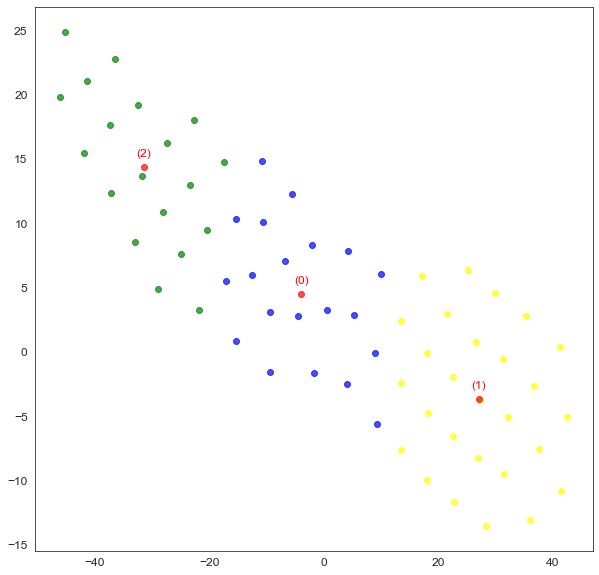

In [27]:
#pilihanwarnaku = {0: 'yellow', 1: 'cyan', 2: 'blue', 3: 'green', 4 : 'magenta',5 :'purple',6 : 'black'}
pilihanwarnaku = {0: 'blue', 1: 'yellow', 2: 'green'}
#pilihanwarnaku = {0: 'yellow', 1: 'cyan'}

plt.figure(figsize=(10,10))
# zip joins x and y coordinates in pairs
for x,y,z in zip(df_scala['kolom2'],df_scala['kolom1'],df_scala['kluster']):
    plt.scatter(x,y, 
                color=pilihanwarnaku[z], 
                alpha=0.7)

for x,y,z in zip(df_pusat_cluster['kolom2'],df_pusat_cluster['kolom1'],df_pusat_cluster['kluster']):
    plt.scatter(x,y, 
                color="red", 
                alpha=0.7)
    
    label = f"({z})"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 c='red') # horizontal alignment can be left, right or center
